# Basic DL project to classify Sign Language Numbers

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the data
x_load = np.load('Sign Language Digits Dataset/Sign-language-digits-dataset/X.npy')
y_load = np.load('Sign Language Digits Dataset/Sign-language-digits-dataset/Y.npy')

In [3]:
x_load[0].shape, y_load[0].shape

((64, 64), (10,))

In [4]:
x_load.shape, y_load.shape

((2062, 64, 64), (2062, 10))

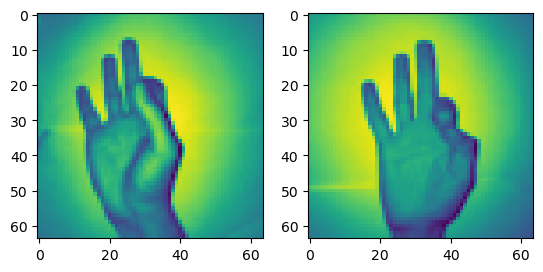

In [5]:
img_size = 64

plt.subplot(1,2,1)
plt.imshow(x_load[0].reshape(img_size,img_size))
plt.subplot(1,2,2)
plt.imshow(x_load[1].reshape(img_size,img_size))

In [6]:
# Get 0 and 1 X features from index 204 to 409 and 822 to 1027
X = np.concatenate((x_load[204:409], x_load[822:1027]), axis=0)

# Create Y 
ZeroClass = np.zeros(205)
OneClass = np.zeros(205)

Y = np.concatenate((ZeroClass, OneClass), axis=0).reshape(X.shape[0],1)

In [7]:
X.shape, Y.shape

((410, 64, 64), (410, 1))

In [8]:
X.ndim , Y.ndim

(3, 2)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# we flatten X_train and X_test to make it suitable for the neural network
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

X_train_flatten.shape, X_test_flatten.shape

((328, 4096), (82, 4096))

In [11]:
# Initialize the weights and Bias with random values
W = np.random.randn(1, X_train_flatten.shape[1])
B = np.random.randn(1)

W.shape, B.shape

((1, 4096), (1,))

In [12]:
# z = W*X + B

# define the sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

# define the derivative of sigmoid function

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))


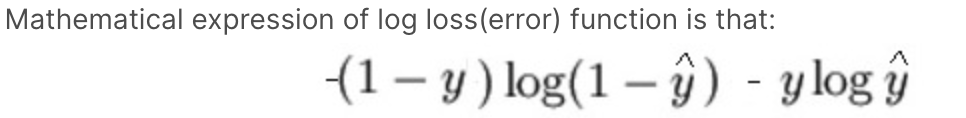

In [13]:
def forward_propogation(W, B, X_train, Y_train):
    z = np.dot(W, X_train.T) + B
    A = sigmoid(z)
    loss = -Y_train*np.log(A) - (1-Y_train)*np.log(1-A)
    # Calculate the cost
    cost = np.sum(loss)/X_train.shape[0] # average loss -> X_train.shape[0] is the number of training examples

    return cost

Cost after iteration 0: 148.600060
Cost after iteration 10: 19.484112
Cost after iteration 20: 10.254770
Cost after iteration 30: 6.492231
Cost after iteration 40: 4.242216
Cost after iteration 50: 2.864417
Cost after iteration 60: 2.022664
Cost after iteration 70: 1.495541
Cost after iteration 80: 1.152348
Cost after iteration 90: 0.919456
Cost after iteration 100: 0.755126
Cost after iteration 110: 0.635051
Cost after iteration 120: 0.544590
Cost after iteration 130: 0.474612
Cost after iteration 140: 0.419232
Cost after iteration 150: 0.374532
Cost after iteration 160: 0.337832
Cost after iteration 170: 0.307250
Cost after iteration 180: 0.281433
Cost after iteration 190: 0.259388
train accuracy: 100.0 %
test accuracy: 98.78048780487805 %


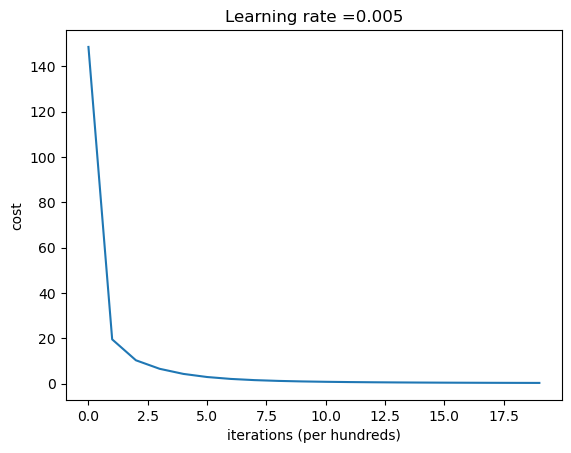

train accuracy: 100.0 %
test accuracy: 98.78048780487805 %


In [14]:
def forward_backword_propogation(W, B, X_train, Y_train):

    z = np.dot(W, X_train.T) + B
    A = sigmoid(z)
    loss = -Y_train*np.log(A) - (1-Y_train)*np.log(1-A)
    # Calculate the cost
    cost = np.sum(loss)/X_train.shape[0] # average loss -> X_train.shape[0] is the number of training examples

    # Backward Propogation
    dW = np.dot((A-Y_train), X_train)/X_train.shape[0]
    dB = np.sum(A-Y_train)/X_train.shape[0]

    return cost, dW, dB

def update_parameters(W, B, dW, dB, learning_rate):
    W = W - learning_rate*dW
    B = B - learning_rate*dB

    return W, B

def predict(W, B, X_test):
    z = np.dot(W, X_test.T) + B
    A = sigmoid(z)
    Y_prediction = np.zeros((1, X_test.shape[0]))

    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, learning_rate, num_iterations):
    W = np.random.randn(1, X_train.shape[1])
    B = np.random.randn(1)

    costs = []

    for i in range(num_iterations):
        cost, dW, dB = forward_backword_propogation(W, B, X_train, Y_train)
        W, B = update_parameters(W, B, dW, dB, learning_rate)

        if i % 10 == 0:
            costs.append(cost)
            print("Cost after iteration %i: %f" %(i, cost))

    Y_prediction_test = predict(W, B, X_test)
    Y_prediction_train = predict(W, B, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "W" : W,
         "B" : B,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

d = model(X_train_flatten, Y_train, X_test_flatten, Y_test, learning_rate = 0.005, num_iterations = 200)

# Plot the cost
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

# Predict the test set
Y_prediction_test = predict(d["W"], d["B"], X_test_flatten)
Y_prediction_train = predict(d["W"], d["B"], X_train_flatten)

# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))